In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from glob import glob
from PIL import Image
from skimage.transform import rotate
from skimage.io import imread
from skimage.io import imsave
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu

In [2]:
def plot_image(img):
    
    plt.figure(figsize = (10, 10))
    plt.imshow(img) #cmap=plt.cm.gray
    plt.show()
    
def binarize_image(image_array):
    return image_array > threshold_otsu(image_array)

In [3]:
all_images = glob('*.png')

In [13]:
image = imread(all_images[5])

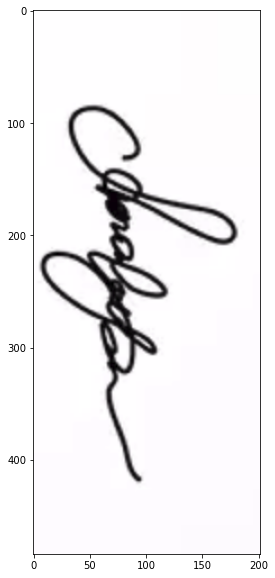

In [14]:
plot_image(image)

In [15]:
HORIZONTAL_REVERZED = 270
HORIZONTAL_ALIGNED = 90

image_correction = rotate(image, HORIZONTAL_ALIGNED, resize=True)

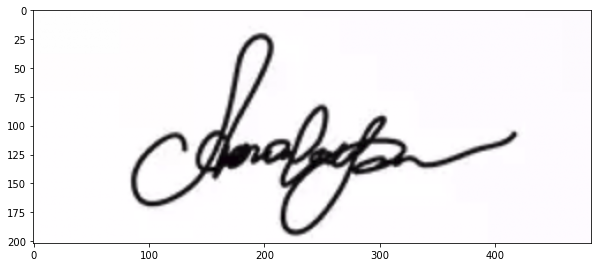

(202, 484, 3)

In [16]:
plot_image(image_correction)
image_correction.shape

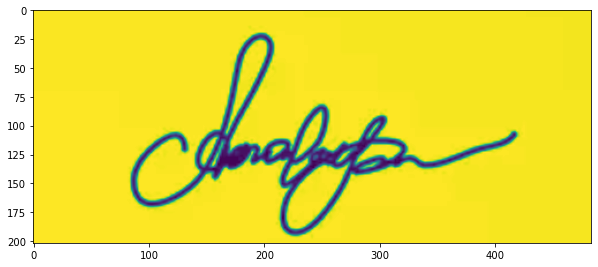

(202, 484)

In [17]:
image_gray = rgb2gray(image_correction)
plot_image(image_gray)
image_gray.shape

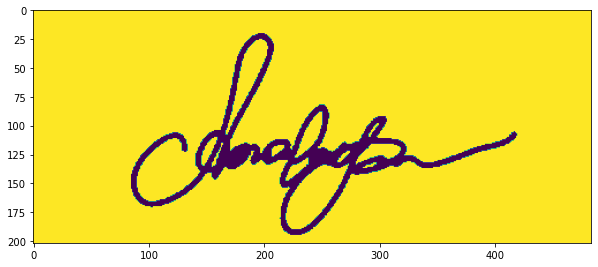

((202, 484), array([False,  True]))

In [18]:
image_bin = binarize_image(image_gray)
plot_image(image_bin)
image_bin.shape, np.unique(image_bin)

In [19]:
def crop_roi_image(img):
    
    """
        Retorno: Imagem cortada somente com o ROI (Region Of Intereting)
    """
    safe_zone = 5
    img_gray = rgb2gray(img)
    img_bin = binarize_image(img_gray)

    #Before
    for before_x in range(img_bin.shape[1]):
        if False in img_bin[:, before_x: before_x + 1]: break
            
    #After
    for after_x in range(img_bin.shape[1], 1, -1):
        if False in img_bin[:, after_x: after_x + 1]: break
            
     #Before
    for before_y in range(img_bin.shape[1]):
        if False in img_bin[before_y: before_y + 1, :]: break
            
    #After
    for after_y in range(img_bin.shape[1], 1, -1):
        if False in img_bin[after_y: after_y + 1, :]: break
            
    return img[before_y - safe_zone: after_y + safe_zone,
               before_x - safe_zone: after_x + safe_zone]

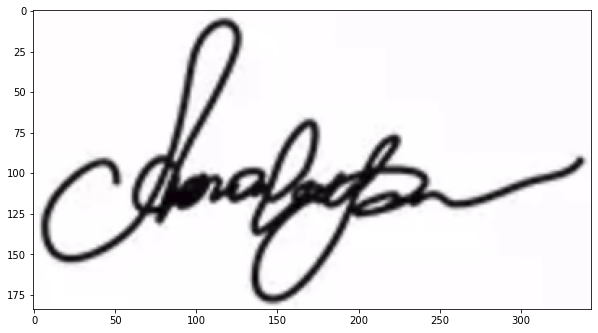

In [20]:
img_ = crop_roi_image(image_correction)
plot_image(img_)

In [22]:
img = Image.fromarray(np.uint8(img_))
img.save('signature.gif', format='GIF', transparency=0)
imsave('teste.png', img_)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
